## Project Overview
In this project, we aim to provide insights for Microsoft's new movie studio by analyzing movie data from Box Office Mojo and TMDB. The business problem is to understand which types of films are currently successful at the box office. We will use the bom.movie_gross.csv and tmdb.movies.csv datasets to explore film genres, ratings, and earnings. Our analysis will involve data cleaning, exploration, and visualization using pandas and seaborn. Based on our findings, we will offer recommendations to help Microsoft decide what types of films to produce.

## Business Problem:
Microsoft wants to enter the movie industry but lacks insights into what types of films are currently successful. The key questions we aim to answer are:

What genres are performing best at the box office?
What is the relationship between movie ratings and earnings?
How do box office earnings vary across different genres?
These questions are crucial for Microsoft to make informed decisions about the types of films to create, ensuring they invest in genres that attract large audiences and generate high revenue.

### Data Understanding:
The data for this project comes from Box Office Mojo and IMDB.

In [25]:
# import packages
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
df1 = pd.read_csv('Data/bom.movie_gross.csv')
df2 = pd.read_csv('Data/tmdb.movies.csv')

# inspect the data
print(df1.head())
print(df2.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 origi

In [4]:
df1.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [5]:
df2.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

### Data Understanding
Box Office Data (bom.movie_gross.csv)
Columns: title, studio, domestic_gross, foreign_gross, year
Target Variables: domestic_gross, foreign_gross
Movie Ratings Data (tmdbmovie.csv)
Columns: movie_id, average_rating, num_votes
Target Variables: average_rating, num_votes

### Data Preparation
We'll clean the data by handling missing values and ensuring consistent data types. We'll merge the datasets on movie_id

In [6]:
# Handling of missing values
# identify missing data
missing_data1 = df1.isna()
missing_data2 = df2.isna()
print(df1.isnull().sum())
print(df2.isnull().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [7]:
# handle the missing values
df1.dropna(subset=['domestic_gross', 'foreign_gross'], inplace=True)

In [10]:
# Convert gross earnings to numeric, handling commas
# replace the NaN values with an integer (0) and change to integer
df1['foreign_gross'] = df1['foreign_gross'].astype(str).str.replace('NaN', 'np.nan', regex=False)
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'], errors='coerce')
df1['foreign_gross'] = df1['foreign_gross'].fillna(0)

df1['domestic_gross'] = df1['domestic_gross'].astype(str).str.replace('NaN', 'np.nan', regex=False)
df1['domestic_gross'] = pd.to_numeric(df1['domestic_gross'], errors='coerce')
df1['domestic_gross'] = df1['domestic_gross'].fillna(0)

df1.domestic_gross = df1.domestic_gross.astype(int)
df1.foreign_gross = df1.foreign_gross.astype(int)

print(df1['foreign_gross'].dtype)

print(df1['domestic_gross'].dtype)

int32
int32


In [11]:
# Inspect cleaned data
print(df1.info())
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2009 non-null   object
 1   studio          2007 non-null   object
 2   domestic_gross  2009 non-null   int32 
 3   foreign_gross   2009 non-null   int32 
 4   year            2009 non-null   int64 
dtypes: int32(2), int64(1), object(2)
memory usage: 78.5+ KB
None
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV       415000000   
1                   Alice in Wonderland (2010)     BV       334200000   
2  Harry Potter and the Deathly Hallows Part 1     WB       296000000   
3                                    Inception     WB       292600000   
4                          Shrek Forever After   P/DW       238700000   

   foreign_gross  year  
0      652000000  2010  
1      691300000  2010  
2      6643

In [12]:
# merge the two datasets
df3 = pd.merge(df1,df2, on='title', how="right")
df3.shape

(26517, 14)

## Data Analysis and Visualization
Key Questions:
What genres are performing best at the box office?
What is the relationship between movie runtime and ratings?
How do box office earnings vary across different genres?

In [13]:
# calculate total gross earnings
df3['total_gross'] = df3['domestic_gross'] + df3['foreign_gross']
df3['total_gross']

0                NaN
1        494900000.0
2        623900000.0
3                NaN
4        828300000.0
            ...     
26512            NaN
26513            NaN
26514            NaN
26515            NaN
26516            NaN
Name: total_gross, Length: 26517, dtype: float64

In [14]:
import requests

# get genre from TMDB movies through api
response = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=104bebf4fc2218b241e2351d57278652')
print(response.status_code)

200


In [15]:
print(response.json())

{'genres': [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 80, 'name': 'Crime'}, {'id': 99, 'name': 'Documentary'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}, {'id': 36, 'name': 'History'}, {'id': 27, 'name': 'Horror'}, {'id': 10402, 'name': 'Music'}, {'id': 9648, 'name': 'Mystery'}, {'id': 10749, 'name': 'Romance'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 10770, 'name': 'TV Movie'}, {'id': 53, 'name': 'Thriller'}, {'id': 10752, 'name': 'War'}, {'id': 37, 'name': 'Western'}]}


In [16]:
# genre mapping from tmdb API
genre_mapping = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History', 
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

df3['genre'] = df3['genre_ids'].map(genre_mapping)

In [24]:
# Summary statistics for numerical columns
summary_stats = df3.describe()

c:\Users\DAVE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DAVE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


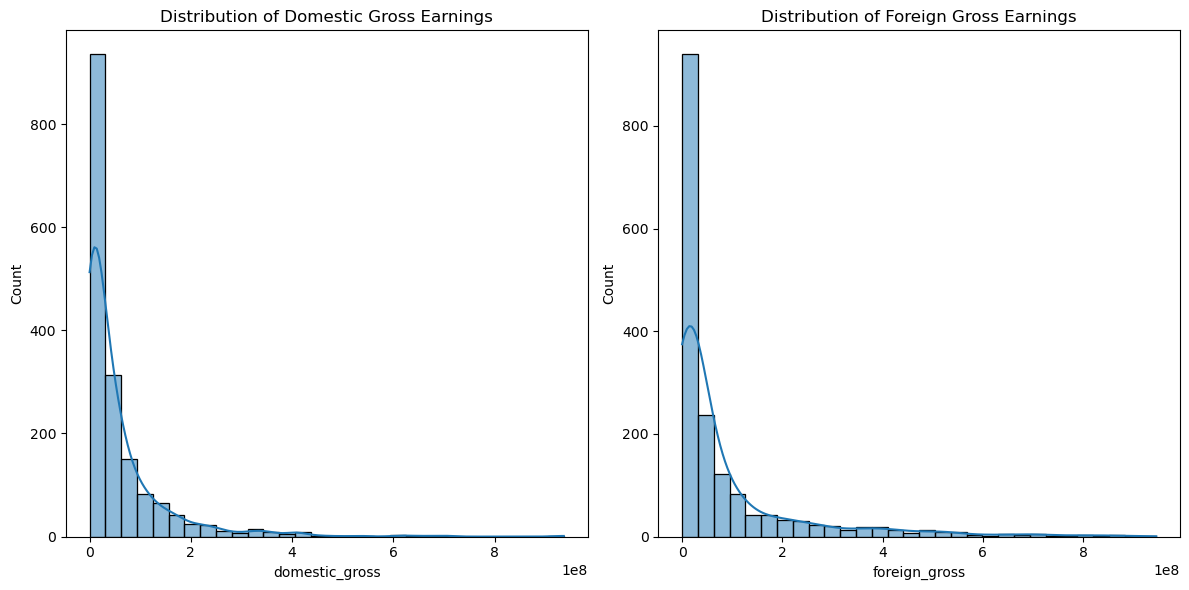

In [26]:
# Distribution of domestic and foreign gross earnings
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df3['domestic_gross'], kde=True, bins=30)
plt.title('Distribution of Domestic Gross Earnings')

plt.subplot(1, 2, 2)
sns.histplot(df3['foreign_gross'], kde=True, bins=30)
plt.title('Distribution of Foreign Gross Earnings')

plt.tight_layout()
plt.show()

In [28]:
# Select only numeric columns for correlation analysis
numeric_columns = df3.select_dtypes(include=[float, int])

# Correlation analysis
correlation_matrix = numeric_columns.corr()

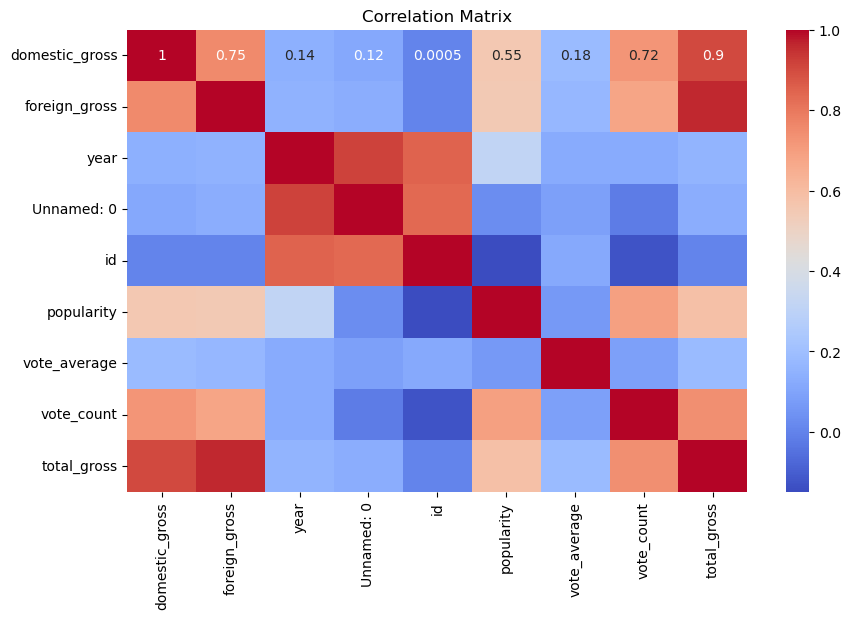

In [29]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()